<a href="https://colab.research.google.com/github/dhkdsns20/Communication/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 지능형 통신공학
# 1번 문항

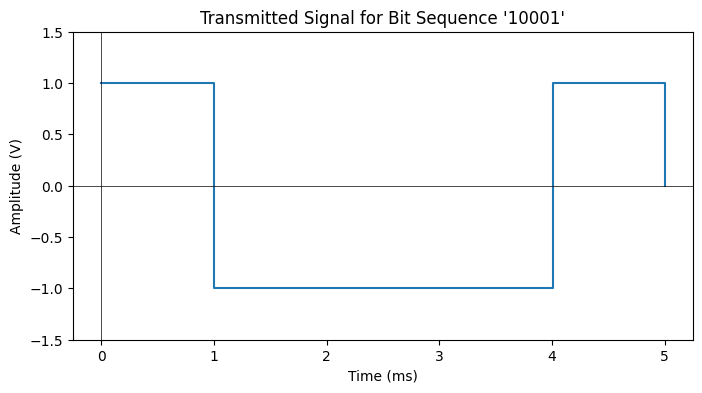

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
A = 1  # 진폭 (V)
T = 1e-3  # 주기 (1ms)

# 디지털 비트열 "10001"에 따른 신호 값
bits = [1, 0, 0, 0, 1]

# 시간 설정 (0부터 5T까지)
t = np.linspace(0, 5 * T, 500)

# 신호 생성
s = np.zeros_like(t)
for i, bit in enumerate(bits):
    start = i * T      # 시작
    end = (i + 1) * T  # 종료
    s[(t >= start) & (t < end)] = A if bit == 1 else -A  # bit '1' 이면 'A' '0' 이면 '-A' 맵핑

# 그래프 그리기
plt.figure(figsize=(8, 4))
plt.plot(t * 1e3, s, drawstyle='steps-post', label="Transmitted Signal")
plt.title("Transmitted Signal for Bit Sequence '10001'")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (V)")
plt.ylim(-1.5 * A, 1.5 * A)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


2번 문항

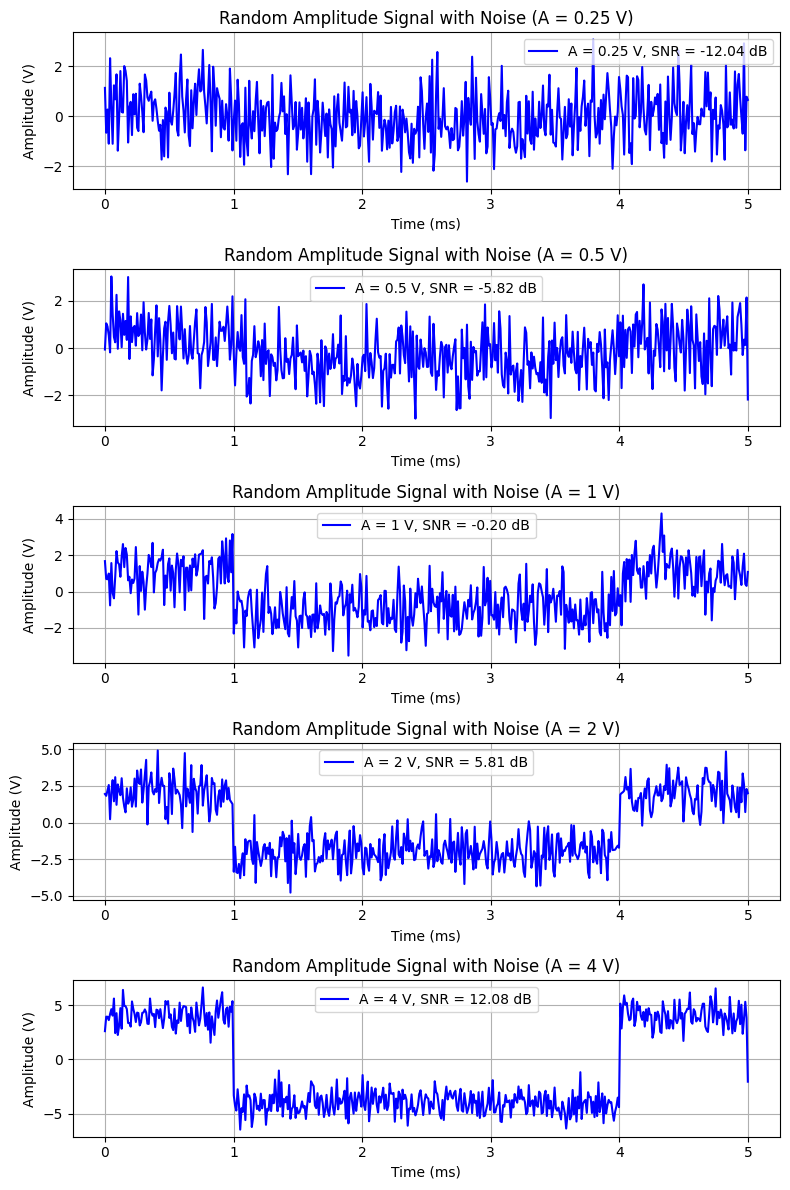

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
sigma = 1  # 표준편차 (정규분포 N(0, 1))
A_values = [0.25, 0.5, 1, 2, 4]  # 진폭 값
T = 1e-3  # 주기 (1ms)
bits = [1, 0, 0, 0, 1]  # 비트열
samples_per_bit = 100  # 각 비트 구간의 샘플 수
t = np.linspace(0, 5 * T, 5 * samples_per_bit)  # 시간 설정

# 그래프 설정
fig, axes = plt.subplots(len(A_values), 1, figsize=(8, 12))

for j, A in enumerate(A_values):
    # 신호 생성
    s = np.zeros_like(t)
    for i, bit in enumerate(bits):
        start = i * T
        end = (i + 1) * T
        s[(t >= start) & (t < end)] = A if bit == 1 else -A

    # 잡음 추가 (정규분포 N(0, 1))
    noise = np.random.normal(0, sigma, len(t))
    noisy_signal = s + noise

    # SNR 계산
    power_signal = np.mean(s ** 2)
    power_noise = np.mean(noise ** 2)
    snr = power_signal / power_noise
    snr_db = 10 * np.log10(snr)

    # 그래프 그리기
    axes[j].plot(t * 1e3, noisy_signal, label=f'A = {A} V, SNR = {snr_db:.2f} dB', color='blue')
    axes[j].set_title(f'Random Amplitude Signal with Noise (A = {A} V)')
    axes[j].set_xlabel('Time (ms)')
    axes[j].set_ylabel('Amplitude (V)')
    axes[j].grid(True)
    axes[j].legend()

plt.tight_layout()
plt.show()
